## Classification (분류)

### 서포트 벡터 머신 (Support Vector Machine, SVM)

* SVM의 최적화 대상은 마진(margin)을 최대화
* 마진: 클래스를 구분하는 초평면과 이 초평면에 가장 가까운 훈련 샘플(서포트 벡터) 사이의 거리

In [28]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch03/figures/03_09.png', width=700)

#### 슬랙 변수
* 선형적으로 구분되지 않는 데이터에서 SVM 최적화 목적 함수에 있는 선형 제약 조건을 완화할 필요가 있어 도입
* 슬랙 변수 (C): 오차에 대한 페널티를 조정하는 파라미터. C값이 클수록 페널티 증가

In [29]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch03/figures/03_10.png', width=600)

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('클래스 레이블:', np.unique(y))

클래스 레이블: [0 1 2]


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [4]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# 맷플롯립 호환성을 체크합니다
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 클래스 샘플을 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        # 모든 샘플을 그립니다.
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='Test set')

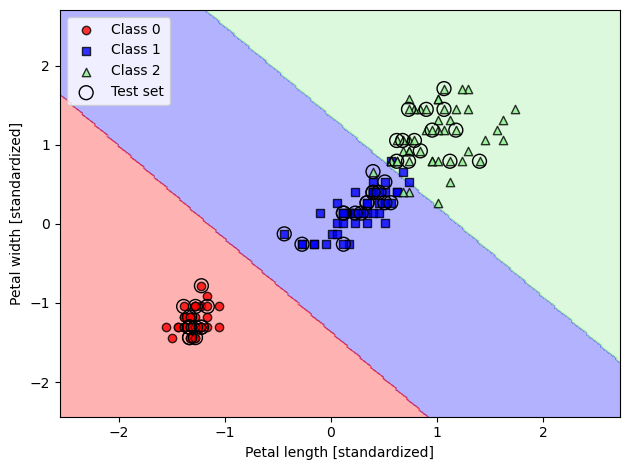

In [12]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_sc, y_train)

X_combined_sc = np.vstack((X_train_sc, X_test_sc))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_sc,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_11.png', dpi=300)
plt.show()

#### 커널 SVM을 사용하여 비선형 문제 풀기


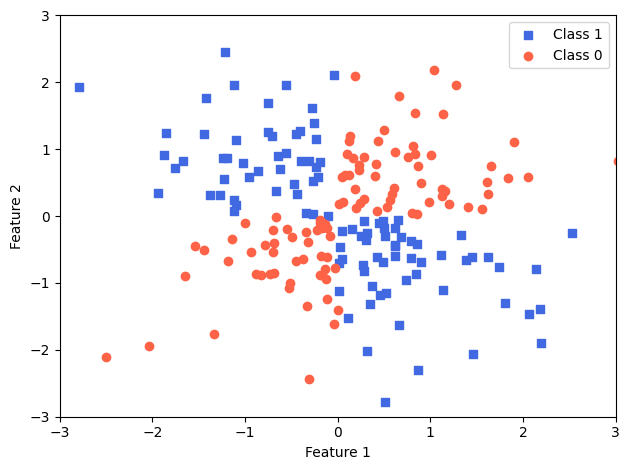

In [32]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='royalblue',
            marker='s',
            label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0, 1],
            c='tomato',
            marker='o',
            label='Class 0')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('figures/03_12.png', dpi=300)
plt.show()

$\phi(x_1,x_2)=(z_1,z_2,z_3)=(x_1,x_2,x_1^2+x_2^2)$

In [33]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch03/figures/03_13.png', width=700)

#### 커널 기법을 사용하여 고차원 공간에서 분할 초평면 찾기

* 커널 함수 (Kernel function)
$$
\mathcal{K}(x^{(i)},x^{(j)})=\phi(x^{(i)})^T \phi(x^{(j)})
$$

* 방사 기저 함수 (Radial Basis Function, RBF)
    - 가우스 커널 (Gaussian kernel) 이라고도 함
$$
\mathcal{K}(x^{(i)},x^{(j)})=exp(-\frac{\|x^{(i)}-x^{(j)}\|^2}{2\sigma^2})\\
$$
$$
\mathcal{K}(x^{(i)},x^{(j)})=exp(-\gamma\|x^{(i)}-x^{(j)}\|^2)
$$

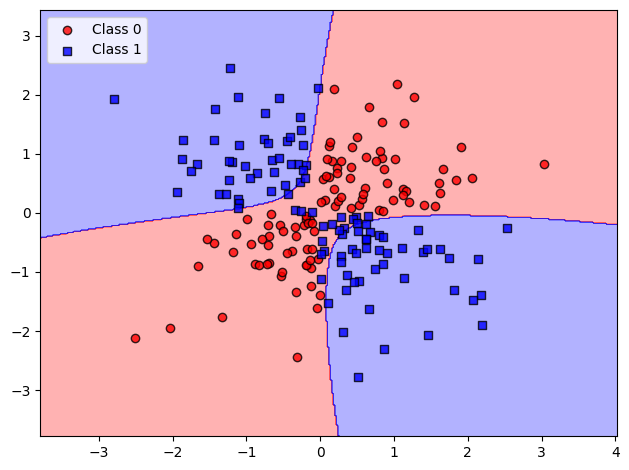

In [34]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_14.png', dpi=300)
plt.show()

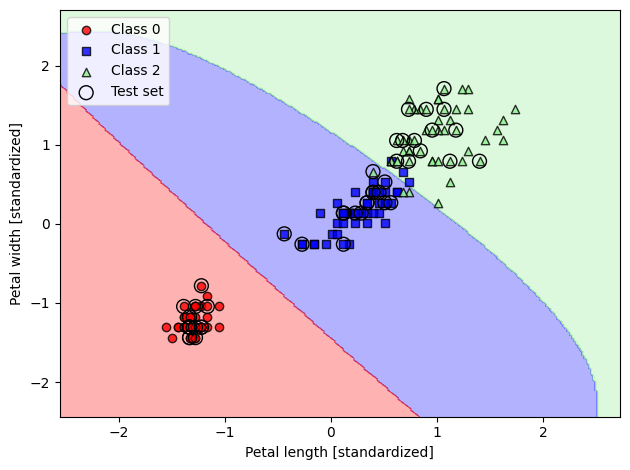

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_sc, y_train)

plot_decision_regions(X_combined_sc, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_15.png', dpi=300)
plt.show()

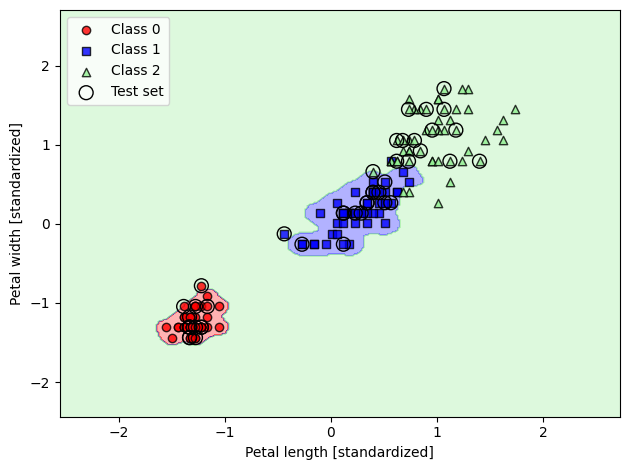

In [ ]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_sc, y_train)

plot_decision_regions(X_combined_sc, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_16.png', dpi=300)
plt.show()